In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
from transformers import pipeline

In [ ]:
import os
plt.style.use('ggplot')
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [ ]:
import nltk
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/bananapeely3123/Dataa/main/Review.csv')
print(df.shape)
# df = df.head(200)
print(df.shape)

(9999, 13)
(9999, 13)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,NaN,NaN,NaN
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,NaN,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,NaN,NaN,NaN
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,NaN,NaN,NaN
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,NaN,NaN


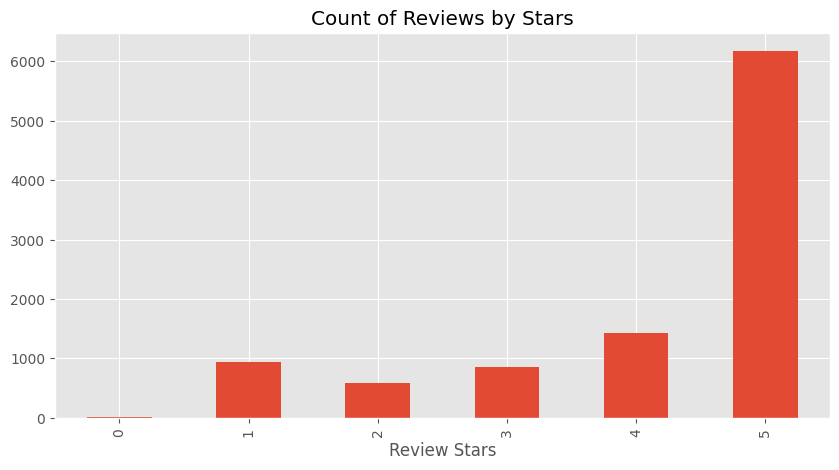

In [ ]:

ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


In [ ]:
example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
tokens = nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
tokens[:10]
tagged = nltk.pos_tag(tokens)
tagged[:10]
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I am so happy!')
sia.polarity_scores('This is the worst thing ever.')
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        # Skip rows where the 'Text' column is null or not a string
        if pd.isnull(text) or not isinstance(text, str):
            continue

        # Apply sentiment analysis only if 'Text' is not null and is a string
        res[myid] = sia.polarity_scores(text)
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/9999 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,NaN,NaN,NaN
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,NaN,NaN
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,NaN,NaN,NaN
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,NaN,NaN,NaN
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,NaN,NaN


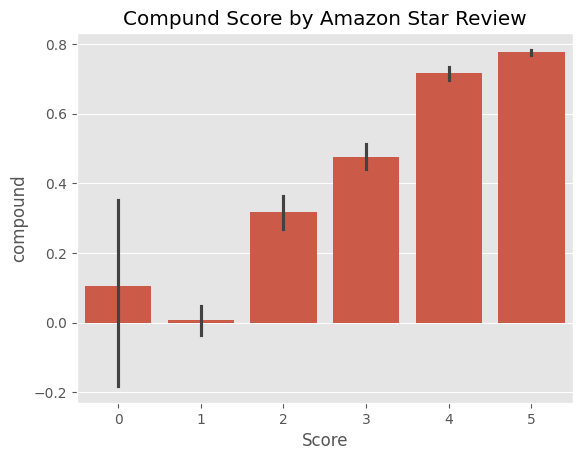

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

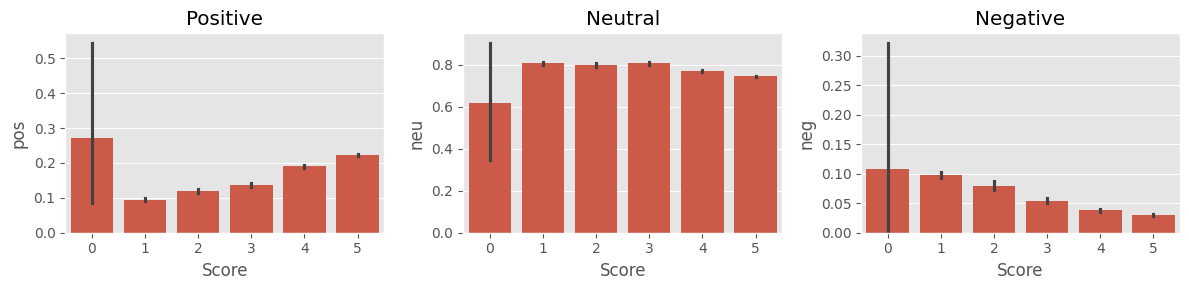

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        # Skip rows where the 'Text' column is null or not a string
        if pd.isnull(text) or not isinstance(text, str):
            continue

        # Perform VADER sentiment analysis
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Perform RoBERTa sentiment analysis
        roberta_result = polarity_scores_roberta(text)

        # Combine VADER and RoBERTa results
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except Exception as e:
        print(f'Error occurred for id {myid}: {e}')


  0%|          | 0/9999 [00:00<?, ?it/s]

Error occurred for id 83: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]
Error occurred for id 187: The expanded size of the tensor (546) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 546].  Tensor sizes: [1, 514]
Error occurred for id 529: The expanded size of the tensor (639) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 639].  Tensor sizes: [1, 514]
Error occurred for id 540: The expanded size of the tensor (1386) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1386].  Tensor sizes: [1, 514]
Error occurred for id 746: The expanded size of the tensor (705) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 705].  Tensor sizes: [1, 514]
Error occurred for id 863: The expanded size of the tensor (605) must match the existing size (514) at n

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

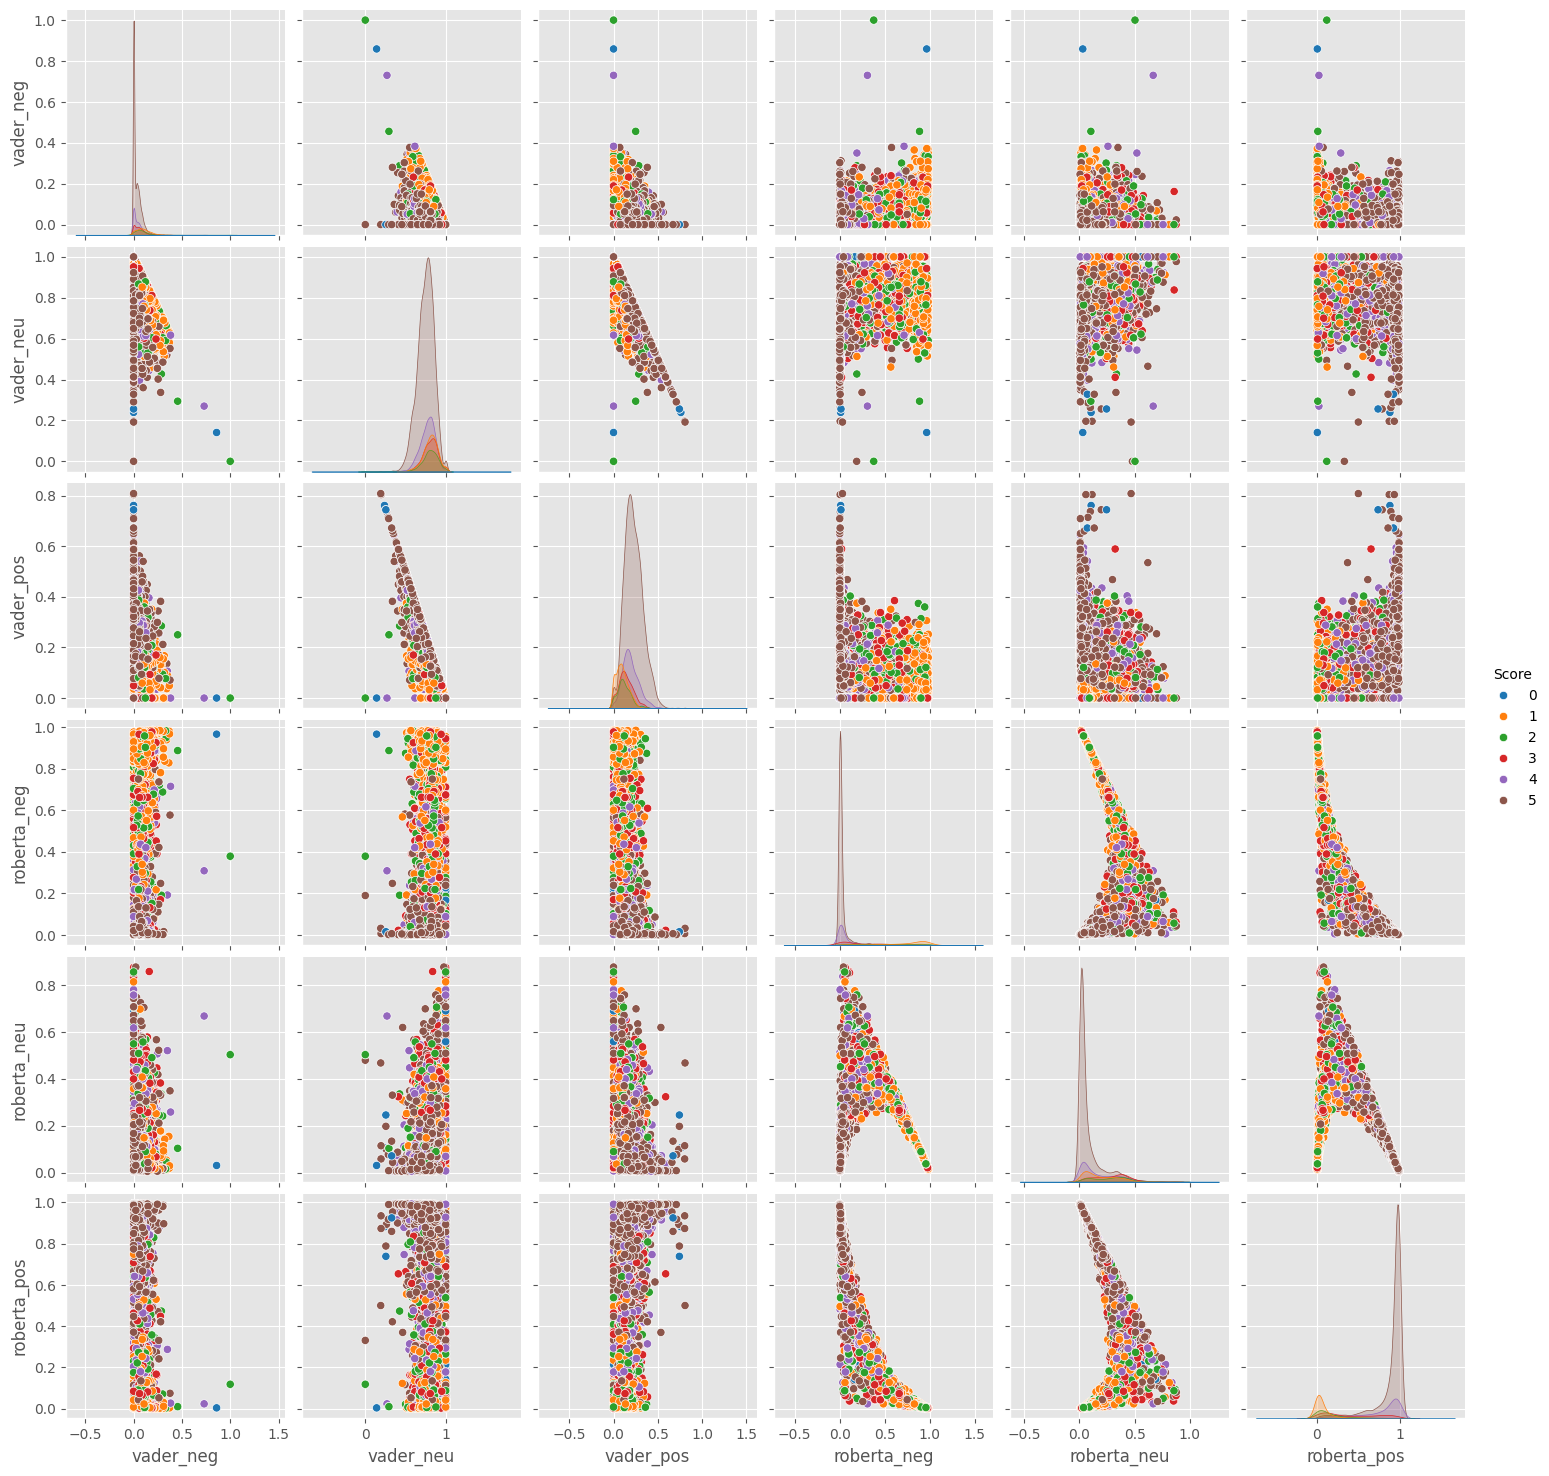

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [ ]:
from transformers import pipeline

MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"

# Create the sentiment analysis pipeline with the specified model
sent_pipeline = pipeline("sentiment-analysis", model=MODEL_NAME)

# Define a mapping for the labels
label_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

# Analyze the sentiment of the given sentences
result1 = sent_pipeline('Make sure to like and subscribe!')
result2 = sent_pipeline('This is the worst product I have ever used.')
result3 = sent_pipeline('The new car model is amazing and offers great performance.')

# Map the labels to more meaningful names
result1_mapped = [{'label': label_mapping[result['label']], 'score': result['score']} for result in result1]
result2_mapped = [{'label': label_mapping[result['label']], 'score': result['score']} for result in result2]
result3_mapped = [{'label': label_mapping[result['label']], 'score': result['score']} for result in result3]

print(result1_mapped)
print(result2_mapped)
print(result3_mapped)


[{'label': 'Positive', 'score': 0.7161287069320679}]
[{'label': 'Negative', 'score': 0.9830895662307739}]
[{'label': 'Positive', 'score': 0.9902413487434387}]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

In [ ]:
def detect_fake_comment(text):
    # Check if the text is null
    if pd.isnull(text):
        return 'null'

    # Analyze sentiment of the comment
    sentiment_score = sia.polarity_scores(str(text))['compound']

    # If sentiment score is very positive or very negative, consider it as fake comment
    if sentiment_score >= 0.5 or sentiment_score <= -0.5:
        return 'fake'
    else:
        return 'genuine'


In [ ]:
df['predicted_class'] = df['Text'].apply(detect_fake_comment)
df['true_class'] = 'genuine'
accuracy = (df['predicted_class'] == df['true_class']).mean()
print("Accuracy of fake comment detection:", accuracy)
df['comment_class'] = df['Text'].apply(detect_fake_comment)

Accuracy of fake comment detection: 0.16801680168016803


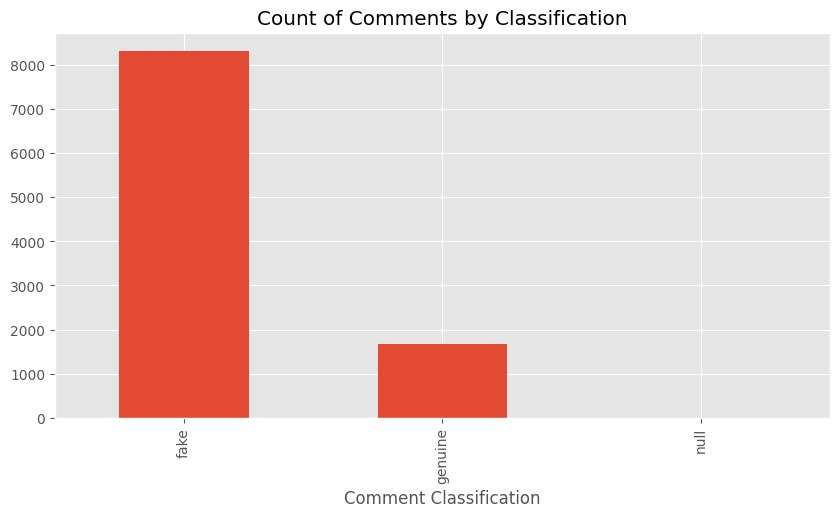

In [ ]:
ax = df['comment_class'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Comments by Classification',
          figsize=(10, 5))
ax.set_xlabel('Comment Classification')
plt.show()

In [ ]:
accuracy = (df['predicted_class'] == df['true_class']).mean()
print("Accuracy of fake comment detection:", accuracy)
num_fake_comments = df['predicted_class'].value_counts()['fake']
print("Number of fake comments:", num_fake_comments)
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
from tqdm import tqdm

Accuracy of fake comment detection: 0.16801680168016803
Number of fake comments: 8318


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        # Skip rows where the 'Text' column is null or not a string
        if pd.isnull(text) or not isinstance(text, str):
            continue

        # Tokenize the text only if it's not null and is a string
        encoded_text = tokenizer(text, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        # Store sentiment scores
        scores_dict = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
        res[myid] = scores_dict
    except Exception as e:
        print(f'Error occurred for id {myid}: {e}')


  1%|          | 82/9999 [00:31<40:48,  4.05it/s]

Error occurred for id 83: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]


  2%|▏         | 186/9999 [01:11<49:27,  3.31it/s]

Error occurred for id 187: The expanded size of the tensor (546) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 546].  Tensor sizes: [1, 514]


  5%|▌         | 528/9999 [03:32<1:22:07,  1.92it/s]

Error occurred for id 529: The expanded size of the tensor (639) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 639].  Tensor sizes: [1, 514]


  5%|▌         | 539/9999 [03:35<48:23,  3.26it/s]

Error occurred for id 540: The expanded size of the tensor (1386) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1386].  Tensor sizes: [1, 514]


  7%|▋         | 745/9999 [05:08<1:33:14,  1.65it/s]

Error occurred for id 746: The expanded size of the tensor (705) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 705].  Tensor sizes: [1, 514]


  9%|▊         | 864/9999 [05:56<41:03,  3.71it/s]  

Error occurred for id 863: The expanded size of the tensor (605) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 605].  Tensor sizes: [1, 514]


 11%|█         | 1052/9999 [07:20<48:17,  3.09it/s]

Error occurred for id 1053: The expanded size of the tensor (789) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 789].  Tensor sizes: [1, 514]


 11%|█         | 1069/9999 [07:27<1:05:32,  2.27it/s]

Error occurred for id 1070: The expanded size of the tensor (585) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 585].  Tensor sizes: [1, 514]


 12%|█▏        | 1155/9999 [08:02<41:11,  3.58it/s]

Error occurred for id 1156: The expanded size of the tensor (597) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 597].  Tensor sizes: [1, 514]


 13%|█▎        | 1320/9999 [09:07<1:18:19,  1.85it/s]

Error occurred for id 1321: The expanded size of the tensor (1246) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1246].  Tensor sizes: [1, 514]


 14%|█▎        | 1374/9999 [09:26<1:43:49,  1.38it/s]

Error occurred for id 1375: The expanded size of the tensor (569) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 569].  Tensor sizes: [1, 514]


 15%|█▍        | 1497/9999 [10:18<58:40,  2.41it/s]  

Error occurred for id 1498: The expanded size of the tensor (1195) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1195].  Tensor sizes: [1, 514]


 16%|█▌        | 1574/9999 [10:54<1:52:17,  1.25it/s]

Error occurred for id 1575: The expanded size of the tensor (555) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 555].  Tensor sizes: [1, 514]


 18%|█▊        | 1797/9999 [12:21<21:40,  6.31it/s]

Error occurred for id 1796: The expanded size of the tensor (527) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 527].  Tensor sizes: [1, 514]


 18%|█▊        | 1827/9999 [12:34<43:51,  3.11it/s]  

Error occurred for id 1826: The expanded size of the tensor (976) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 976].  Tensor sizes: [1, 514]


 22%|██▏       | 2168/9999 [15:08<45:18,  2.88it/s]

Error occurred for id 2169: The expanded size of the tensor (585) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 585].  Tensor sizes: [1, 514]


 22%|██▏       | 2247/9999 [15:42<54:15,  2.38it/s]  

Error occurred for id 2248: The expanded size of the tensor (1043) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1043].  Tensor sizes: [1, 514]


 25%|██▍       | 2475/9999 [17:17<50:24,  2.49it/s]

Error occurred for id 2476: The expanded size of the tensor (550) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 550].  Tensor sizes: [1, 514]


 25%|██▍       | 2491/9999 [17:28<46:43,  2.68it/s]

Error occurred for id 2492: The expanded size of the tensor (803) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 803].  Tensor sizes: [1, 514]


 26%|██▌       | 2583/9999 [18:06<38:04,  3.25it/s]

Error occurred for id 2584: The expanded size of the tensor (879) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 879].  Tensor sizes: [1, 514]


 26%|██▌       | 2609/9999 [18:16<1:20:36,  1.53it/s]

Error occurred for id 2610: The expanded size of the tensor (779) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 779].  Tensor sizes: [1, 514]


 29%|██▉       | 2896/9999 [20:26<1:09:36,  1.70it/s]

Error occurred for id 2897: The expanded size of the tensor (603) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 603].  Tensor sizes: [1, 514]
Error occurred for id 2898: The expanded size of the tensor (740) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 740].  Tensor sizes: [1, 514]


 29%|██▉       | 2901/9999 [20:27<30:26,  3.89it/s]

Error occurred for id 2902: The expanded size of the tensor (538) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 538].  Tensor sizes: [1, 514]


 29%|██▉       | 2927/9999 [20:38<1:30:16,  1.31it/s]

Error occurred for id 2928: The expanded size of the tensor (791) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 791].  Tensor sizes: [1, 514]


 29%|██▉       | 2943/9999 [20:44<43:37,  2.70it/s]  

Error occurred for id 2942: The expanded size of the tensor (1073) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1073].  Tensor sizes: [1, 514]
Error occurred for id 2944: The expanded size of the tensor (524) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 524].  Tensor sizes: [1, 514]


 29%|██▉       | 2946/9999 [20:45<41:28,  2.83it/s]

Error occurred for id 2947: The expanded size of the tensor (524) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 524].  Tensor sizes: [1, 514]
Error occurred for id 2948: The expanded size of the tensor (1073) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1073].  Tensor sizes: [1, 514]


 30%|███       | 3021/9999 [21:16<36:32,  3.18it/s]

Error occurred for id 3022: The expanded size of the tensor (945) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 945].  Tensor sizes: [1, 514]
Error occurred for id 3023: The expanded size of the tensor (940) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 940].  Tensor sizes: [1, 514]


 30%|███       | 3024/9999 [21:17<25:05,  4.63it/s]

Error occurred for id 3025: The expanded size of the tensor (826) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 826].  Tensor sizes: [1, 514]


 33%|███▎      | 3305/9999 [23:09<39:48,  2.80it/s]

Error occurred for id 3306: The expanded size of the tensor (860) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 860].  Tensor sizes: [1, 514]


 38%|███▊      | 3789/9999 [26:23<22:53,  4.52it/s]

Error occurred for id 3788: The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]


 40%|███▉      | 3968/9999 [27:27<37:24,  2.69it/s]

Error occurred for id 3969: The expanded size of the tensor (551) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 551].  Tensor sizes: [1, 514]


 41%|████      | 4108/9999 [28:29<29:39,  3.31it/s]

Error occurred for id 4107: The expanded size of the tensor (585) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 585].  Tensor sizes: [1, 514]


 41%|████      | 4109/9999 [28:30<34:00,  2.89it/s]

Error occurred for id 4110: The expanded size of the tensor (593) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 593].  Tensor sizes: [1, 514]


 43%|████▎     | 4306/9999 [29:57<40:39,  2.33it/s]

Error occurred for id 4307: The expanded size of the tensor (886) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 886].  Tensor sizes: [1, 514]


 43%|████▎     | 4315/9999 [30:04<1:28:08,  1.07it/s]

Error occurred for id 4316: The expanded size of the tensor (928) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 928].  Tensor sizes: [1, 514]


 44%|████▍     | 4409/9999 [30:39<25:36,  3.64it/s]

Error occurred for id 4408: The expanded size of the tensor (793) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 793].  Tensor sizes: [1, 514]


 45%|████▍     | 4484/9999 [31:08<18:20,  5.01it/s]

Error occurred for id 4483: The expanded size of the tensor (635) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 635].  Tensor sizes: [1, 514]


 45%|████▌     | 4511/9999 [31:22<33:29,  2.73it/s]

Error occurred for id 4512: The expanded size of the tensor (540) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 540].  Tensor sizes: [1, 514]


 46%|████▌     | 4552/9999 [31:46<42:52,  2.12it/s]

Error occurred for id 4553: The expanded size of the tensor (543) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 543].  Tensor sizes: [1, 514]


 46%|████▌     | 4582/9999 [32:08<1:16:34,  1.18it/s]

Error occurred for id 4583: The expanded size of the tensor (826) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 826].  Tensor sizes: [1, 514]


 50%|█████     | 5039/9999 [35:34<33:09,  2.49it/s]

Error occurred for id 5040: The expanded size of the tensor (572) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 572].  Tensor sizes: [1, 514]


 52%|█████▏    | 5181/9999 [36:33<25:43,  3.12it/s]

Error occurred for id 5182: The expanded size of the tensor (521) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 521].  Tensor sizes: [1, 514]


 52%|█████▏    | 5193/9999 [36:41<40:18,  1.99it/s]  

Error occurred for id 5192: The expanded size of the tensor (521) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 521].  Tensor sizes: [1, 514]


 54%|█████▎    | 5364/9999 [37:48<39:07,  1.97it/s]

Error occurred for id 5365: The expanded size of the tensor (658) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 658].  Tensor sizes: [1, 514]


 54%|█████▍    | 5441/9999 [38:26<34:54,  2.18it/s]

Error occurred for id 5442: The expanded size of the tensor (682) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 682].  Tensor sizes: [1, 514]


 57%|█████▋    | 5708/9999 [40:21<21:54,  3.26it/s]

Error occurred for id 5709: The expanded size of the tensor (754) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 754].  Tensor sizes: [1, 514]


 60%|█████▉    | 5997/9999 [42:23<18:11,  3.67it/s]

Error occurred for id 5998: The expanded size of the tensor (1077) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1077].  Tensor sizes: [1, 514]


 60%|██████    | 6002/9999 [42:26<38:11,  1.74it/s]

Error occurred for id 6003: The expanded size of the tensor (603) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 603].  Tensor sizes: [1, 514]


 60%|██████    | 6006/9999 [42:28<43:26,  1.53it/s]

Error occurred for id 6007: The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]


 61%|██████    | 6107/9999 [43:10<17:55,  3.62it/s]

Error occurred for id 6106: The expanded size of the tensor (706) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 706].  Tensor sizes: [1, 514]


 62%|██████▏   | 6233/9999 [44:03<42:36,  1.47it/s]

Error occurred for id 6234: The expanded size of the tensor (564) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 564].  Tensor sizes: [1, 514]


 66%|██████▌   | 6557/9999 [46:33<43:56,  1.31it/s]

Error occurred for id 6558: The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]


 67%|██████▋   | 6650/9999 [47:19<48:28,  1.15it/s]  

Error occurred for id 6651: The expanded size of the tensor (924) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 924].  Tensor sizes: [1, 514]


 68%|██████▊   | 6797/9999 [48:50<35:09,  1.52it/s]

Error occurred for id 6798: The expanded size of the tensor (629) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 629].  Tensor sizes: [1, 514]


 68%|██████▊   | 6849/9999 [49:25<1:00:43,  1.16s/it]

Error occurred for id 6850: The expanded size of the tensor (1149) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1149].  Tensor sizes: [1, 514]


 69%|██████▉   | 6885/9999 [49:45<20:49,  2.49it/s]

Error occurred for id 6886: The expanded size of the tensor (631) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 631].  Tensor sizes: [1, 514]


 69%|██████▉   | 6904/9999 [49:56<43:26,  1.19it/s]

Error occurred for id 6905: The expanded size of the tensor (544) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 544].  Tensor sizes: [1, 514]


 70%|██████▉   | 6954/9999 [50:24<25:18,  2.00it/s]

Error occurred for id 6955: The expanded size of the tensor (617) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 617].  Tensor sizes: [1, 514]


 71%|███████   | 7076/9999 [51:14<18:07,  2.69it/s]

Error occurred for id 7077: The expanded size of the tensor (717) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 717].  Tensor sizes: [1, 514]


 71%|███████   | 7087/9999 [51:19<17:20,  2.80it/s]

Error occurred for id 7088: The expanded size of the tensor (603) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 603].  Tensor sizes: [1, 514]


 72%|███████▏  | 7200/9999 [52:05<14:33,  3.21it/s]

Error occurred for id 7201: The expanded size of the tensor (705) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 705].  Tensor sizes: [1, 514]


 76%|███████▌  | 7605/9999 [54:47<12:44,  3.13it/s]

Error occurred for id 7604: The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]


 76%|███████▌  | 7607/9999 [54:48<14:40,  2.72it/s]

Error occurred for id 7608: The expanded size of the tensor (710) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 710].  Tensor sizes: [1, 514]


 77%|███████▋  | 7670/9999 [55:13<15:32,  2.50it/s]

Error occurred for id 7671: The expanded size of the tensor (617) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 617].  Tensor sizes: [1, 514]


 77%|███████▋  | 7700/9999 [55:34<22:01,  1.74it/s]

Error occurred for id 7701: The expanded size of the tensor (628) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 628].  Tensor sizes: [1, 514]


 78%|███████▊  | 7809/9999 [56:19<21:07,  1.73it/s]

Error occurred for id 7810: The expanded size of the tensor (788) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 788].  Tensor sizes: [1, 514]


 79%|███████▉  | 7906/9999 [56:59<32:05,  1.09it/s]

Error occurred for id 7907: The expanded size of the tensor (672) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 672].  Tensor sizes: [1, 514]


 81%|████████  | 8076/9999 [58:18<08:35,  3.73it/s]

Error occurred for id 8077: The expanded size of the tensor (1259) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1259].  Tensor sizes: [1, 514]


 81%|████████▏ | 8130/9999 [58:37<13:52,  2.24it/s]

Error occurred for id 8131: The expanded size of the tensor (584) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 584].  Tensor sizes: [1, 514]


 83%|████████▎ | 8265/9999 [59:37<13:59,  2.06it/s]

Error occurred for id 8266: The expanded size of the tensor (524) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 524].  Tensor sizes: [1, 514]


 87%|████████▋ | 8739/9999 [1:02:36<10:52,  1.93it/s]

Error occurred for id 8740: The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]


 88%|████████▊ | 8756/9999 [1:02:46<08:40,  2.39it/s]

Error occurred for id 8757: The expanded size of the tensor (2017) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 2017].  Tensor sizes: [1, 514]


 89%|████████▉ | 8934/9999 [1:04:04<05:08,  3.45it/s]

Error occurred for id 8935: The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]


 96%|█████████▌| 9589/9999 [1:08:15<05:28,  1.25it/s]

Error occurred for id 9590: The expanded size of the tensor (530) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 530].  Tensor sizes: [1, 514]


 98%|█████████▊| 9849/9999 [1:10:19<02:09,  1.16it/s]

Error occurred for id 9850: The expanded size of the tensor (2149) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 2149].  Tensor sizes: [1, 514]


 99%|█████████▉| 9880/9999 [1:10:28<00:48,  2.48it/s]

Error occurred for id 9881: The expanded size of the tensor (612) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 612].  Tensor sizes: [1, 514]


 99%|█████████▉| 9909/9999 [1:10:45<01:35,  1.06s/it]

Error occurred for id 9910: The expanded size of the tensor (636) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 636].  Tensor sizes: [1, 514]


 99%|█████████▉| 9922/9999 [1:10:52<00:42,  1.79it/s]

Error occurred for id 9923: The expanded size of the tensor (572) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 572].  Tensor sizes: [1, 514]


100%|██████████| 9999/9999 [1:11:27<00:00,  2.33it/s]


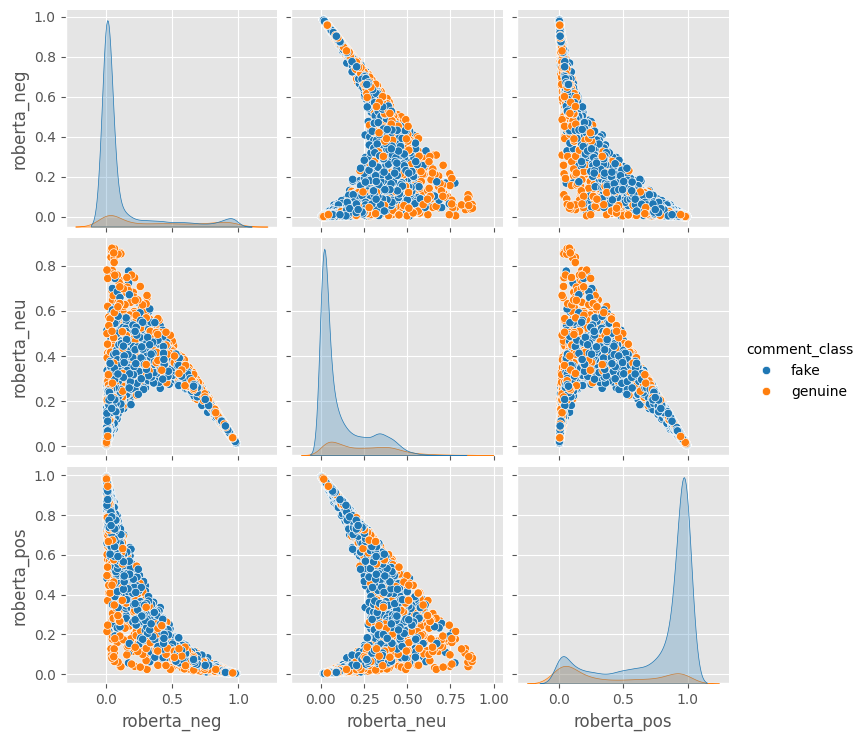

In [ ]:
results_df = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
sns.pairplot(data=results_df,
             vars=['roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='comment_class',
             palette='tab10')
plt.show()

In [ ]:
comment=" Apple Vision Pro sets a new standard for professional creativity. Its unparalleled display clarity and advanced processing capabilities empower creators to bring their visions to life with stunning precision. With Apple Vision Pro, innovation meets inspiration, elevating the creative process to new heights."

detect_fake_comment(comment)

'fake'

In [ ]:
comment2= " Just got my hands on the new Nothing Phone and I'm seriously impressed! Sleek, minimalist design with a powerful performance to match. It's like holding the future in your palm. Bye bye, cluttered distractions – hello, simplicity!"
detect_fake_comment(comment2)


'fake'

In [ ]:
comment3=" this is a very good product for my daily use"
detect_fake_comment(comment3)


'genuine'

In [ ]:
comment5 = "This car is so amazing, it's like driving a spaceship!"
detect_fake_comment(comment5)

'fake'

In [ ]:
comment6 = "this car is good"
detect_fake_comment(comment6)

'genuine'